# Generating Synthetic Data with SMOTE - SciKit Breast Cancer Data

David Pugh, August 2018

Investigating the use of SMOTE and ADASYN to generate synthetic data based on an existing dataset.
Data set is Sci Kit learn breast cancer dataset 

In [35]:
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.datasets import load_breast_cancer

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import math
from scipy import stats

print(__doc__)
%matplotlib inline

Automatically created module for IPython interactive environment


In [36]:
RANDOM_STATE = 32

### Create Dataset

In [37]:
bc

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [38]:
bc = load_breast_cancer()

original_df = pd.DataFrame(data= np.c_[bc['data']])
                           
 #                          , columns= bc['feature_names'] + ['target'])
original_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now create a dataset with 2:1 ratio


In [39]:
# get rid of NaNs
original_df = original_df.apply(lambda x: pd.Series(x.dropna().values))

# check for NaNs
pd.isnull(original_df).sum() > 0
original_df.head()

n_features = len(original_df.columns)

original_df.columns = list(range(0,n_features))
original_df['target'] = 0
print(original_df.head())
print(original_df.groupby('target').count())

cols=list(range(0,n_features))
#create a df with 2x orginal data with target =0
original_2_df = original_df.append(original_df)

#Add teh original again but with target = 1
original_df['target'] = 1
original_2_df = original_2_df.append(original_df)
print(original_2_df.info())

print(original_2_df.groupby('target').count())

# you want all rows, and the feature_cols' columns
X = original_2_df.iloc[:, :-1].values
y = original_2_df['target'].values

       0      1       2       3        4        5       6        7       8  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

         9   ...       21      22      23      24      25      26      27  \
0  0.07871   ...    17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667   ...    23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999   ...    25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744   ...    26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883   ...    16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28       29  target  
0  0.4601  0.11890       0  
1  0.2750 

### Create Samplers

In [40]:
samplers = [
    ['ADASYN', ADASYN(random_state=RANDOM_STATE)],
    ['SMOTE - Reg', SMOTE(kind='regular', random_state=RANDOM_STATE)],
    ['SMOTE - B1', SMOTE(kind='borderline1', random_state=RANDOM_STATE)],
    ['SMOTE - B2', SMOTE(kind='borderline2', random_state=RANDOM_STATE)],
    #['SMOTE - SVM', SMOTE(kind='svm', random_state=RANDOM_STATE)]
]

###  Define function to plot correlation matrix

In [41]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

def correlation_matrix(df, title, file=""):
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(10,10))
    corr_plot = sns.heatmap(df, square=True, cmap= cmap, vmax=0.5, vmin=-0.5, mask=mask,  center=0, linewidths=.5, cbar_kws={"shrink": .5}).set_title(title)
    
    if file != "":
        fig = corr_plot.get_figure()
        fig.savefig(file+'.png', bbox_inches='tight')

In [42]:
def bhatta ( hist1,  hist2):
  '''Calculates the Byattacharyya distance of two histograms.'''

  def normalize(h):
    return h / np.sum(h)

  return 1 - np.sum(np.sqrt(np.multiply(normalize(hist1), normalize(hist2))))

In [43]:
def return_intersection(hist1, hist2):
    minima = np.minimum(hist1, hist2)
    intersection = np.true_divide(np.sum(minima), np.sum(hist2))
    return intersection

### Define function to resample data and compare with original

In [44]:
def resample_and_compare(X,y,sampler, folder, txt_fontsize=6):
    #Create a resampled data set 
    X_res, y_res = sampler[1].fit_sample(X,y)
    resampled_df = pd.DataFrame(X_res)
    resampled_df['target'] = y_res
    
    #Merge resampled and original data, then drop duplicates
    merged_df = pd.concat([original_df, resampled_df])
    #these are the new resampled datapoints
    generated_df = merged_df.drop_duplicates(keep=False).reset_index(drop=True)
    #print(generated_df.info())
    
    generated_df['sampler'] = sampler[0]
    #correlate each original dataset minoroty classes with the new resampled one
    print("\n------------------------------------------------------------------------\n")
    print("----------- " + sampler[0])
    
    #plt.figure()
    figfile = folder + '/orig_and_gen_data_'+ sampler[0]
    f, axes = plt.subplots(n_features, figsize=(7,35))
    """f.subplots_adjust(left=0.125, 
                        bottom=0.1, 
                        right=0.9, 
                        top=2.0,
                        wspace=0.2, 
                        hspace=0.2)"""
    
    axes[0].set_title("Original and Generated Data using " + sampler[0], fontsize="x-large")
        
    pearsonrs=[]
    intersections=[]
    bhatts=[]
    method =[]
    
    for i in cols:
        s = sns.distplot(generated_df[i], hist=False, rug=False, label="G-"+ str(i), ax=axes[i], 
                     kde_kws={'linestyle':'-', 'linewidth':3})
        sns.distplot(original_df[i], hist=False, rug=False, label="O-"+ str(i), ax=axes[i], 
                     kde_kws={'linestyle':'--', 'linewidth':2})
        
        
        o_hist, _ = np.histogram(original_df[i], bins=100)
        g_hist, _ = np.histogram(generated_df[i], bins=100)
        bhatt = bhatta(o_hist, g_hist)  
        intersection = return_intersection(o_hist, g_hist)
        pearson = stats.pearsonr(o_hist,g_hist)
                
        pearsonrs.append(pearson[0])
        bhatts.append(bhatt)
        intersections.append(intersection)
        method.append(sampler[0])
        
        print("Intersection for {}: {:03.2f} ".format(i ,intersection ))
        #axes[i].text(0.15, 0.85,'Intersection:{} '.format(intersection), fontsize=9) #add text
        s.text(0.02, 0.90,'Pearson Coeff:', 
                     fontsize=txt_fontsize,  horizontalalignment='left',
                     verticalalignment='center',
                     transform = axes[i].transAxes)
        s.text(0.2, 0.90,'{:05.3f}'.format(pearson[0]), 
                     fontsize=txt_fontsize,  horizontalalignment='left',
                     verticalalignment='center',
                     transform = axes[i].transAxes)
        
        s.text(0.02, 0.80,'Intersection:', 
                     fontsize=txt_fontsize,  horizontalalignment='left',
                     verticalalignment='center',
                     transform = axes[i].transAxes)
        s.text(0.2, 0.80,'{:05.3f}'.format(intersection), 
                     fontsize=txt_fontsize,  horizontalalignment='left',
                     verticalalignment='center',
                     transform = axes[i].transAxes)       
        
        s.text(0.02, 0.70,'Bhattacharyya Dist:', fontsize=txt_fontsize,  horizontalalignment='left',
                     verticalalignment='center',
                     transform = axes[i].transAxes)
        s.text(0.2, 0.70,'{:05.3f}'.format(bhatt), 
                     fontsize=txt_fontsize,  horizontalalignment='left',
                     verticalalignment='center',
                     transform = axes[i].transAxes)
        
    f.savefig(figfile+'.png', bbox_inches='tight')
    
    #print("Original Data")
    #print(original_df.head())
    original_corr = original_df.iloc[:, :-1].corr()
    
    #print("Generated Data")
    #print(generated_df.head())    
    gen_corr = generated_df.iloc[:, :-2].corr()
    
    print("\nCorrelation Matrix - {}".format(sampler[0]))
    correlation_matrix(gen_corr, 'Generated Data '+ sampler[0])
    
    print("Correlation Matrix Diff - {}".format(sampler[0]))
    correlation_matrix(original_corr - gen_corr, 'Correlation Difference ' + sampler[0], folder + '/corr_diff_data_'+ sampler[0])
    
    summary_df = pd.DataFrame( data = {'method': method,
                                       'feature': cols, 
                                       'pearsonr': pearsonrs, 
                                       'intersection': intersections,
                                       'bhattacharyya': bhatts})

    summary_df.to_csv(folder + '/summary_stats_'+ sampler[0], index=False)

### Correlation plot of the original data

     0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
6   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
11  0.0  0.0  0.0  0.0  0.0 

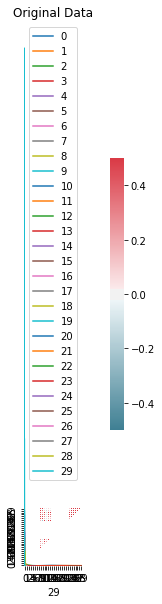

In [45]:
orignal_corr  = original_df.iloc[:, :-1].corr()
print(orignal_corr - orignal_corr )
correlation_matrix(orignal_corr, 'Original Data')

for i in cols:
    sns.distplot(original_df[i], hist=False, rug=False, label=i)
    plt.legend()


In [46]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Generate synthetic data for each sampler type and compare correlation matrix to original data


------------------------------------------------------------------------

----------- ADASYN
Intersection for 0: 0.80 
Intersection for 1: 0.72 
Intersection for 2: 0.85 
Intersection for 3: 0.85 
Intersection for 4: 0.80 
Intersection for 5: 0.78 
Intersection for 6: 0.84 
Intersection for 7: 0.79 
Intersection for 8: 0.79 
Intersection for 9: 0.80 
Intersection for 10: 0.83 
Intersection for 11: 0.77 
Intersection for 12: 0.85 
Intersection for 13: 0.90 
Intersection for 14: 0.83 
Intersection for 15: 0.77 
Intersection for 16: 0.64 
Intersection for 17: 0.57 
Intersection for 18: 0.77 
Intersection for 19: 0.79 
Intersection for 20: 0.86 
Intersection for 21: 0.78 
Intersection for 22: 0.83 
Intersection for 23: 0.86 
Intersection for 24: 0.76 
Intersection for 25: 0.81 
Intersection for 26: 0.78 
Intersection for 27: 0.77 
Intersection for 28: 0.83 
Intersection for 29: 0.77 

Correlation Matrix - ADASYN
Correlation Matrix Diff - ADASYN

-------------------------------------------

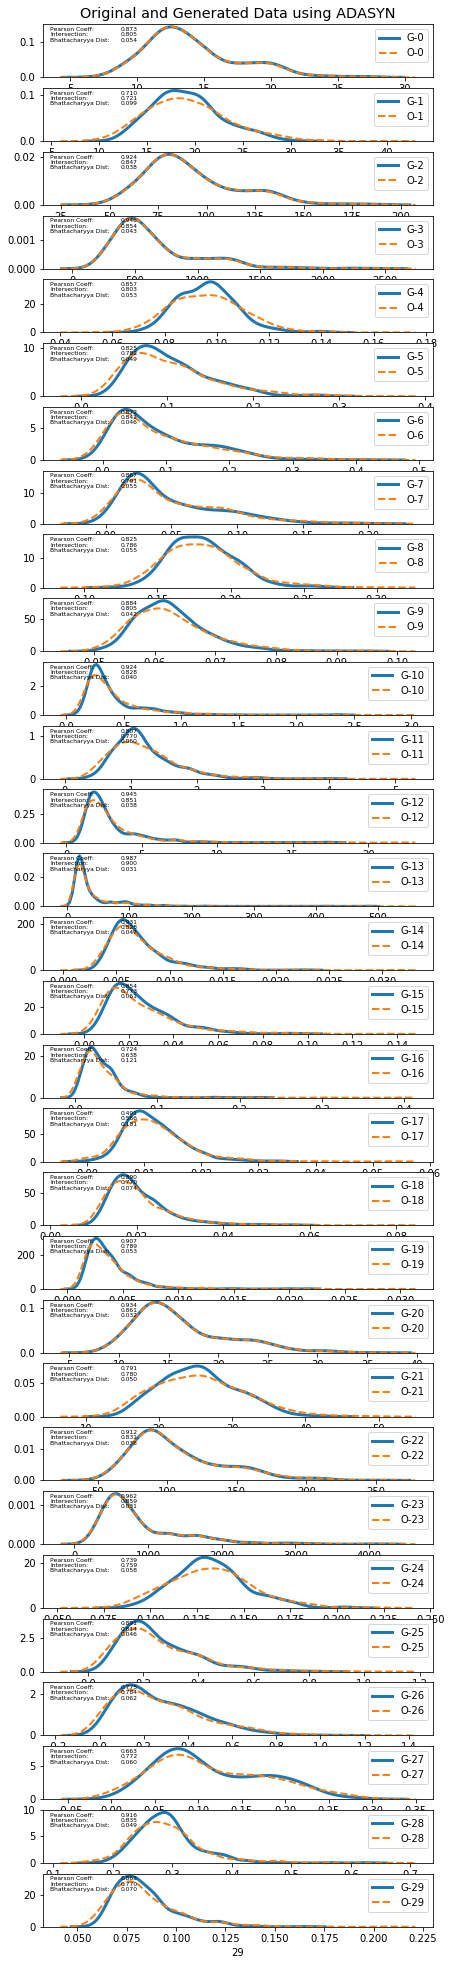

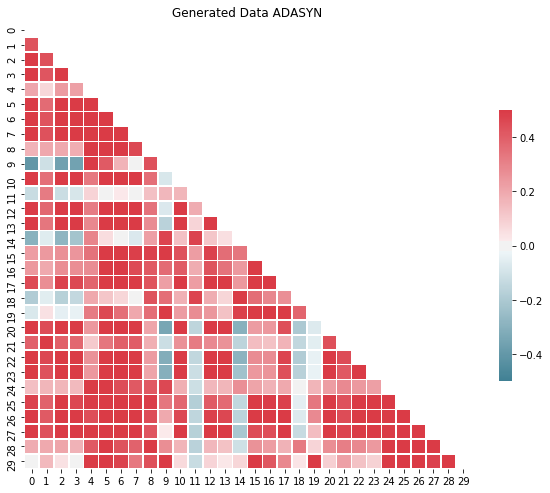

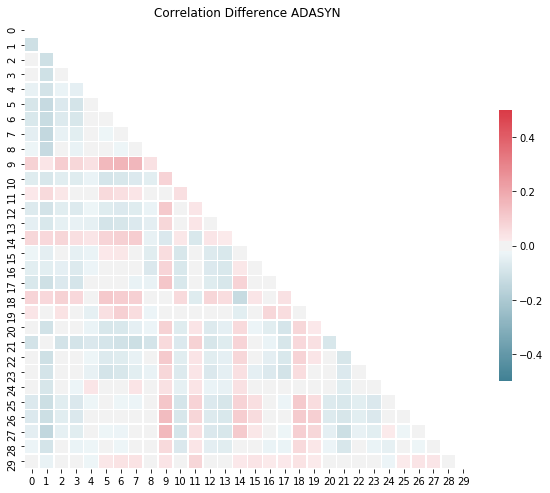

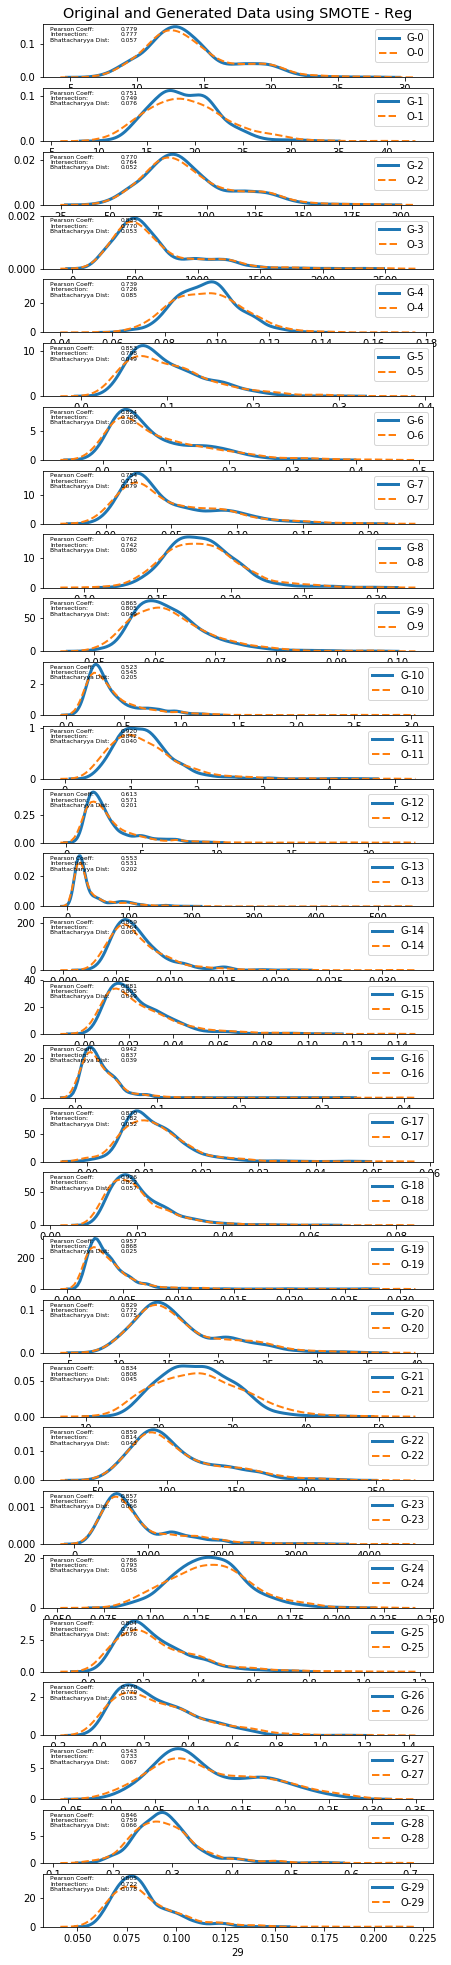

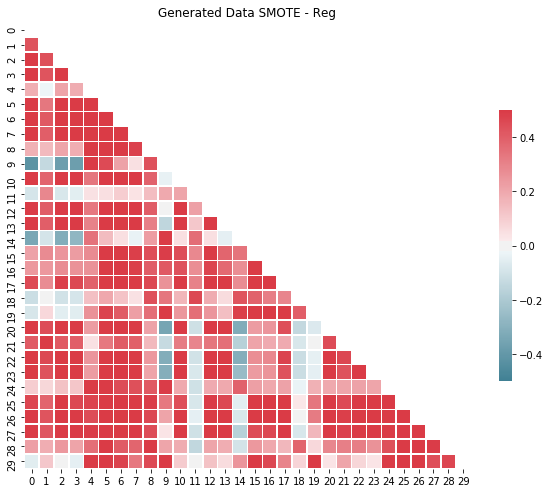

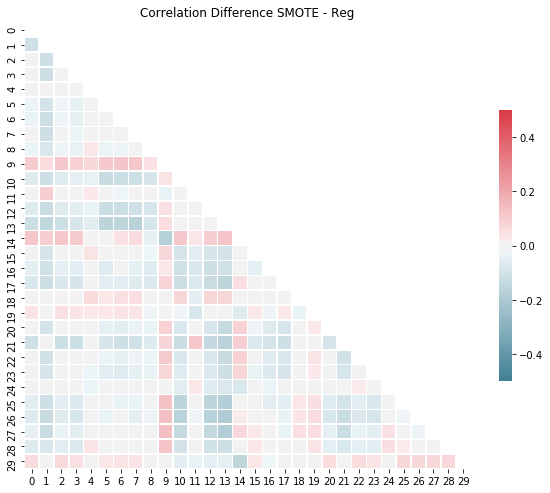

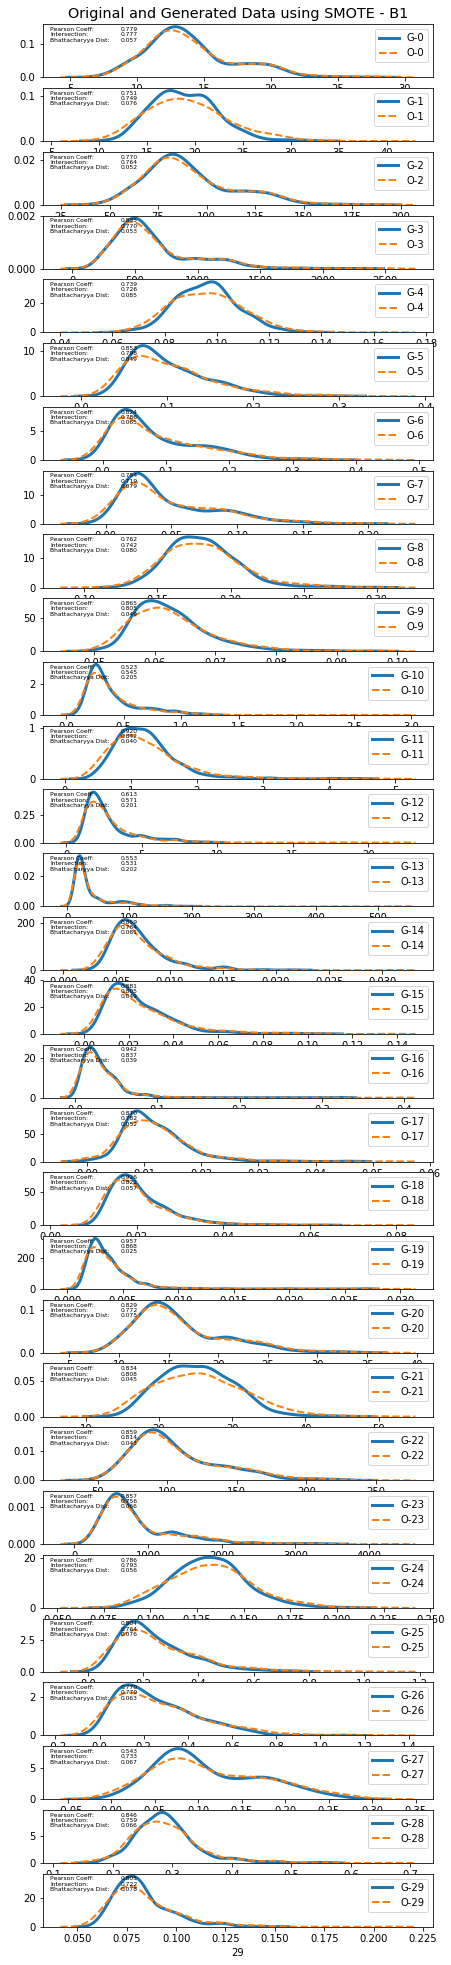

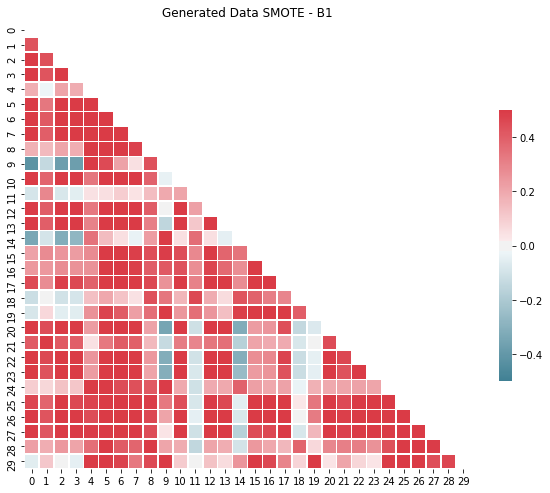

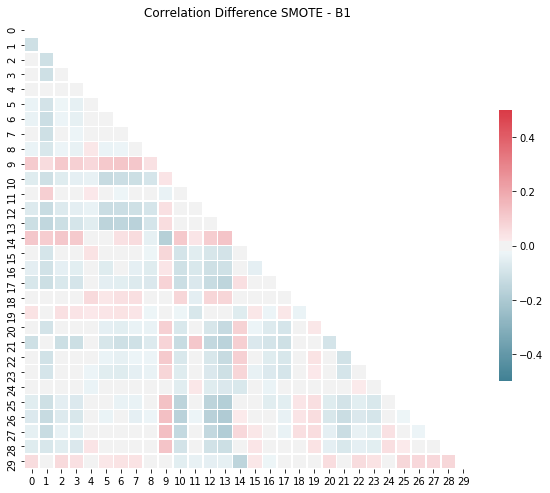

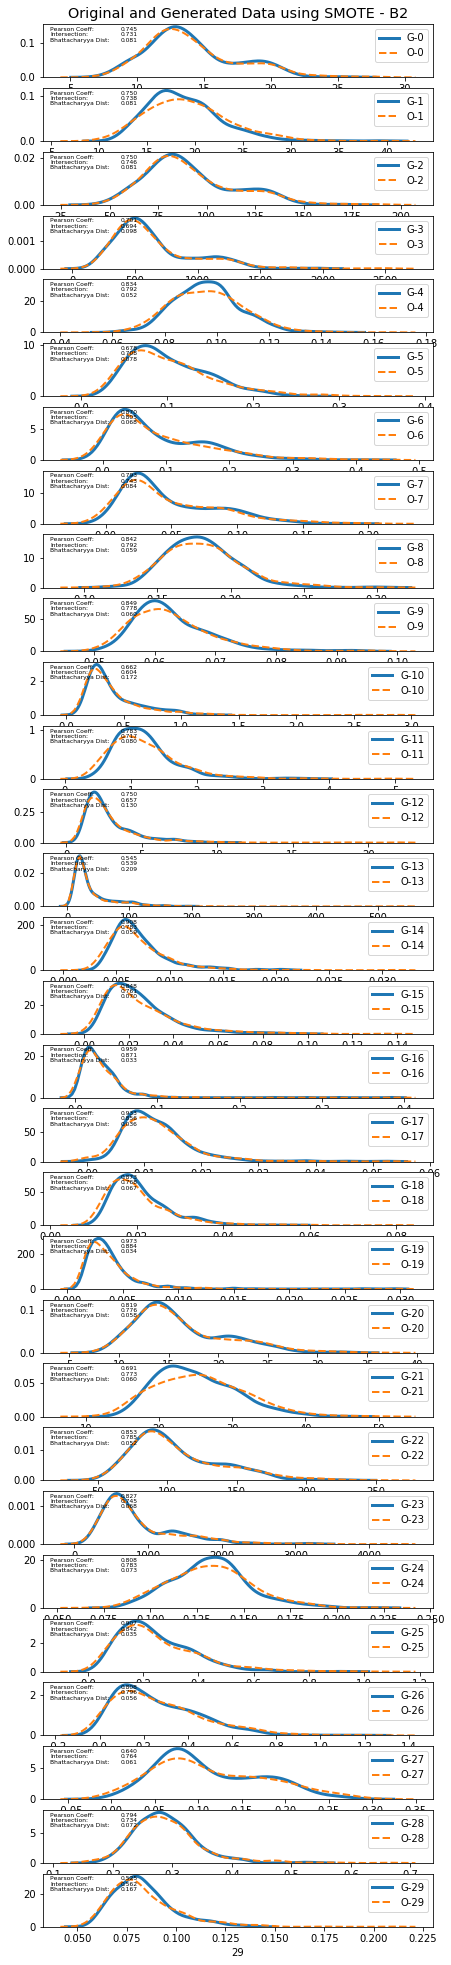

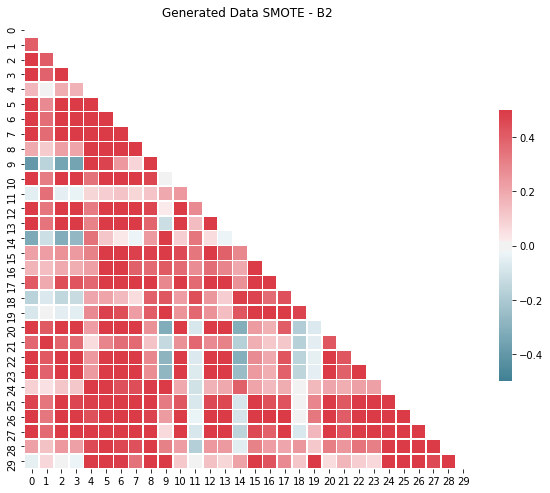

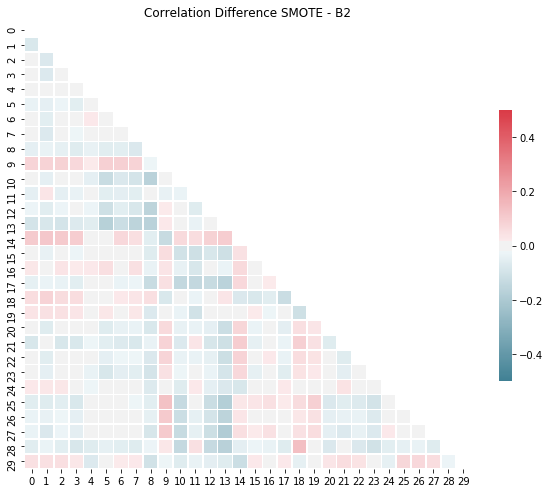

In [47]:
for sampler in samplers:
    resample_and_compare(X,y,sampler,'smote_breast_cancer_data', 6)

### 